In [461]:
import pandas as pd
import numpy as np

df = pd.read_csv('prepared_data.csv')
df = df.drop(df.columns[0],axis=1)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,is_risky
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,NaN,NaN,NaN,not_risky
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,NaN,NaN,NaN,risky
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,0.0,0.0,NaN,NaN,NaN,not_risky
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,0.0,0.0,NaN,NaN,NaN,not_risky
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,OR,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-01-01,0.0,0.0,NaN,NaN,NaN,not_risky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,2014-01-01,Current,debt_consolidation,Debt consolidation,TX,19.85,0.0,2003-04-01,2.0,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,2016-01-01,432.64,2016-01-01,0.0,0.0,0.0,294998.0,29900.0,not_risky
466281,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,2014-01-01,Charged Off,debt_consolidation,Debt consolidation,TN,18.45,0.0,1997-06-01,5.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,2014-12-01,17.50,2016-01-01,0.0,0.0,0.0,221830.0,39400.0,risky
466282,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,2014-01-01,Current,debt_consolidation,Debt consolidation,OH,25.65,0.0,2001-12-01,2.0,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,2016-01-01,514.34,2015-12-01,0.0,0.0,0.0,73598.0,13100.0,not_risky
466283,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,2014-01-01,Fully Paid,credit_card,Credit card refinancing,CA,5.39,3.0,2003-02-01,1.0,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,2014-12-01,1500.68,2015-04-01,0.0,0.0,0.0,591610.0,53100.0,not_risky


# Cleansing

## Hapus kolom title: karena mirip dengan purpose, lalu hapus loan_status karena telah diekstrak menjadi label

In [462]:
df = df.drop(['title','loan_status'], axis=1)

## Missing Value

In [463]:
df_missing = pd.DataFrame(100*df.isna().sum()/df.shape[0], columns=['%null'])
df_missing['dtype'] = df.dtypes
df_missing.sort_values(by='%null',ascending=False)

,%null,dtype
total_rev_hi_lim,15.071469,float64
tot_cur_bal,15.071469,float64
tot_coll_amt,15.071469,float64
emp_title,5.916553,object
emp_length,4.505399,object
last_pymnt_d,0.080637,object
revol_util,0.072917,float64
collections_12_mths_ex_med,0.031097,float64
last_credit_pull_d,0.009007,object
earliest_cr_line,0.006219,object


### Kolom kolom tanggal

In [464]:
# Mengonversi kolom tanggal menjadi datetime
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], errors='coerce')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], errors='coerce')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')
df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')

# Ekstrak bulan dan tahun
df['last_pymnt_month'] = df['last_pymnt_d'].dt.month.fillna(0).astype(int)
df['last_pymnt_year'] = df['last_pymnt_d'].dt.year.fillna(0).astype(int)

df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month.fillna(0).astype(int)
df['issue_d_month'] = df['issue_d'].dt.month.fillna(0).astype(int)

df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year.fillna(0).astype(int)
df['issue_d_year'] = df['issue_d'].dt.year.fillna(0).astype(int)

df['last_credit_pull_month'] = df['last_credit_pull_d'].dt.month.fillna(0).astype(int)
df['last_credit_pull_year'] = df['last_credit_pull_d'].dt.year.fillna(0).astype(int)

df = df.drop(['last_pymnt_d','last_credit_pull_d','earliest_cr_line','issue_d'],axis=1)


### Numerical: Median

In [465]:
numerical_cols = [
    'total_rev_hi_lim', 'tot_coll_amt', 'tot_cur_bal', 
     'revol_util', 'collections_12_mths_ex_med', 
    'total_acc', 'acc_now_delinq', 'pub_rec', 
    'open_acc', 'inq_last_6mths', 'delinq_2yrs','annual_inc'
]

for col in numerical_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

### Categorical: Mode

In [466]:
categorical_cols = ['emp_title', 'home_ownership', 'grade', 'sub_grade', 'verification_status',
                    'purpose', 'addr_state', 'initial_list_status', 'emp_length']

for col in categorical_cols:
    mode_value = df[col].mode()[0]  # Ambil mode
    df[col] = df[col].fillna(mode_value)

In [467]:
# Menghitung jumlah nilai null untuk setiap kolom
null_counts = df.isna().sum()

# Menampilkan kolom yang memiliki nilai null lebih dari 0
null_counts[null_counts > 0]

Series([], dtype: int64)

## Simpan di pickle

In [468]:
import pickle

imputation_values = {
    "median": {},
    "mode": {}
}

numerical_cols = [
    'total_rev_hi_lim', 'tot_coll_amt', 'tot_cur_bal', 
    'revol_util', 'collections_12_mths_ex_med', 
    'total_acc', 'acc_now_delinq', 'pub_rec', 
    'open_acc', 'inq_last_6mths', 'delinq_2yrs','annual_inc'
]

for col in numerical_cols:
    imputation_values["median"][col] = df[col].median()

# Categorical: mode
categorical_cols = [
    'emp_title', 'home_ownership', 'grade', 'sub_grade', 'verification_status',
    'purpose', 'addr_state', 'initial_list_status', 'emp_length'
]

for col in categorical_cols:
    imputation_values["mode"][col] = df[col].mode()[0]

# Simpan ke file pickle
with open("imputation_values.pkl", "wb") as f:
    pickle.dump(imputation_values, f)

## Menyederhanakan emp_title

In [469]:
df['emp_title'].nunique()

205475

In [470]:
# Versi 1: Hapus pekerjaan yg muncul < 10 kali
# title_counts = df['emp_title'].value_counts()
# single_mask = title_counts <=10
# singles = single_mask.index[single_mask].tolist()
# print("Employee title yang hanya muncul <10 kali:", len(singles))

# # Buat array boolean mask untuk lokasi yang perlu diubah
# mask = df['emp_title'].isin(singles)
 
# df.loc[mask, 'emp_title'] = 'Other'

# Versi 2: Ambil top 100 pekerjaan, sisanya others
N = 100
top_categories = df['emp_title'].value_counts().nlargest(N).index
df['emp_title'] = df['emp_title'].apply(lambda x: x if x in top_categories else 'Other')

In [471]:
print(top_categories)

Index(['Teacher', 'Manager', 'Registered Nurse', 'RN', 'Supervisor', 'Sales',
       'Project Manager', 'Owner', 'Office Manager', 'manager', 'Driver',
       'General Manager', 'Director', 'teacher', 'Engineer', 'driver',
       'Vice President', 'President', 'owner', 'Administrative Assistant',
       'Operations Manager', 'Attorney', 'Accountant', 'supervisor',
       'Police Officer', 'sales', 'Sales Manager', 'Account Manager',
       'Store Manager', 'Executive Assistant', 'truck driver', 'US Army',
       'Analyst', 'Technician', 'Nurse', 'Software Engineer', 'Truck Driver',
       'Assistant Manager', 'Paralegal', 'Controller', 'Program Manager',
       'Branch Manager', 'registered nurse', 'Consultant', 'Account Executive',
       'Administrator', 'Bank of America', 'Business Analyst', 'Principal',
       'Mechanic', 'Professor', 'Server', 'Executive Director', 'IT Manager',
       'mechanic', 'Electrician', 'Registered nurse', 'CEO',
       'Customer Service', 'Associate', 'A

In [472]:
df['emp_title'].value_counts()

emp_title
Other               372221
Teacher              32987
Manager               4438
Registered Nurse      2316
RN                    2204
                     ...  
Bartender              232
server                 231
Truck driver           231
Legal Secretary        230
IT Specialist          228
Name: count, Length: 101, dtype: int64

In [473]:
df['emp_title'].nunique()

101

In [474]:
# !python -m spacy download en_core_web_sm

In [475]:
# import spacy

# nlp = spacy.load("en_core_web_sm")

# def detect_profession(title):
#     doc = nlp(title)
#     for ent in doc.ents:
#         if ent.label_ == "PERSON":  # Menggunakan label yang sesuai
#             return ent.text
#     return 'Other' 

# df['emp_title_catefory'] = df['emp_title'].apply(detect_profession)

# Outlier

In [476]:
import numpy as np
import pandas as pd

# Fungsi winsorize
def winsorize_dataframe(df, columns, lower_percentile=0.01, upper_percentile=0.99):
    df_result = df.copy()
    
    #batas bawah dan atas sekali untuk semua kolom
    lower_bounds = {col: df[col].quantile(lower_percentile) for col in columns}
    upper_bounds = {col: df[col].quantile(upper_percentile) for col in columns}
    
    #Terapkan winsorization
    for col in columns:
        df_result[col] = df_result[col].clip(lower=lower_bounds[col], upper=upper_bounds[col])
    
    return df_result

# Kolom yang ingin diwinsorize
columns_to_winsorize = [
    'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
    'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
    'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
    'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
    'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
    'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'
]

# Terapkan winsorization dalam satu langkah
df = winsorize_dataframe(df, columns_to_winsorize)

# Pisahkan Categoricla dan Numeric

In [477]:
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['int', 'float']).columns

# Encoding

In [478]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'is_risky',
       'last_pymnt_month', 'last_pymnt_year', 'earliest_cr_line_month',
       'issue_d_month', 'earliest_cr_line_year', 'issue_d_year',
       'last_credit_pull_month', 'last_credit_pull_year'],
      dtype='object')

In [479]:
pd.set_option('display.max_columns', None)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,is_risky,last_pymnt_month,last_pymnt_year,earliest_cr_line_month,issue_d_month,earliest_cr_line_year,issue_d_year,last_credit_pull_month,last_credit_pull_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.0000,861.07,0.00,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0,not_risky,1,2015,1,12,1985,2011,1,2016
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Other,< 1 year,RENT,30000.0,Source Verified,car,GA,1.68,0.0,4.0,3.0,0.0,1687.0,9.4,6.0,f,0.00,0.00,1048.865200,1008.71,544.4484,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0.0,81539.0,22800.0,risky,4,2013,4,12,1999,2011,9,2013
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,18700.0,Not Verified,small_business,IL,8.72,0.0,2.0,3.0,0.0,2956.0,97.9,10.0,f,0.00,0.00,3003.653644,3003.65,2400.0000,603.65,0.00,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0,not_risky,6,2014,11,12,2001,2011,1,2016
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,Other,10+ years,RENT,49200.0,Source Verified,other,CA,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.0000,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0,not_risky,1,2015,2,12,1996,2011,1,2015
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,Other,1 year,RENT,80000.0,Source Verified,other,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.1000,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,0.0,81539.0,22800.0,not_risky,1,2016,1,12,1996,2011,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Other,4 years,MORTGAGE,110000.0,Source Verified,debt_consolidation,TX,19.85,0.0,2.0,18.0,0.0,23208.0,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.0000,4557.36,0.00,0.00,0.00,432.64,0.0,0.0,0.0,294998.0,29900.0,not_risky,1,2016,4,1,2003,2014,1,2016
466281,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Other,10+ years,MORTGAGE,78000.0,Verified,debt_consolidation,TN,18.45,0.0,4.0,18.0,1.0,18238.0,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.0400,2840.88,0.00,0.00,0.00,34.17,0.0,0.0,0.0,221830.0,39400.0,risky,12,2014,6,1,1997,2014,1,2016
466282,20700,20700,20700.0,60 months,16.99,514.34,D,D1,Other,7 years,MORTGAGE,46000.0,Verified,debt_consolidation,OH,25.65,0.0,2.0,18.0,0.0,6688.0,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.6900,6072.29,0.00,0.00,0.00,514.34,0.0,0.0,0.0,73598.0,13100.0,not_risky,1,2016,12,1,2001,2014,12,2015
466283,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Other,3 years,OWN,83000.0,Verified,credit_card,CA,5.39,3.0,1.0,21.0,0.0,11404.0,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.0000,126.58,0.00,0.00,0.00,1500.68,0.0,0.0,0.0,591610.0,53100.0,not_risky,12,2014,2,1,2003,2014,4,2015


In [480]:
term_order = ['36 months', '60 months']
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
subgrade_order = [
    'A1', 'A2', 'A3', 'A4', 'A5',
    'B1', 'B2', 'B3', 'B4', 'B5',
    'C1', 'C2', 'C3', 'C4', 'C5',
    'D1', 'D2', 'D3', 'D4', 'D5',
    'E1', 'E2', 'E3', 'E4', 'E5',
    'F1', 'F2', 'F3', 'F4', 'F5',
    'G1', 'G2', 'G3', 'G4', 'G5'
]
is_risky_order = ['not_risky','risky']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    df[col] = df[col].str.strip()

# Encoding untuk kolom dengan urutan tertentu
df['term'] = pd.Categorical(df['term'], categories=term_order, ordered=True).codes
df['grade'] = pd.Categorical(df['grade'], categories=grade_order, ordered=True).codes
df['emp_length'] = pd.Categorical(df['emp_length'], categories=emp_length_order, ordered=True).codes
df['sub_grade'] = pd.Categorical(df['sub_grade'], categories=subgrade_order, ordered=True).codes
df['is_risky'] = pd.Categorical(df['is_risky'], categories=is_risky_order, ordered=True).codes

# Encoding untuk kolom lainnya
other_columns = df.select_dtypes(include=['object']).columns.difference(['term', 'grade', 'emp_length', 'sub_grade','is_risky'])
for col in other_columns:
    df[col] = le.fit_transform(df[col])

In [482]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,is_risky,last_pymnt_month,last_pymnt_year,earliest_cr_line_month,issue_d_month,earliest_cr_line_year,issue_d_year,last_credit_pull_month,last_credit_pull_year
0,5000,5000,4975.0,0,10.65,162.87,1,6,76,10,5,24000.0,2,1,3,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.00,0.00,5861.071414,5831.78,5000.0000,861.07,0.00,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0,0,1,2015,1,12,1985,2011,1,2016
1,2500,2500,2500.0,1,15.27,59.83,2,13,52,0,5,30000.0,1,0,10,1.68,0.0,4.0,3.0,0.0,1687.0,9.4,6.0,0,0.00,0.00,1048.865200,1008.71,544.4484,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0.0,81539.0,22800.0,1,4,2013,4,12,1999,2011,9,2013
2,2400,2400,2400.0,0,15.96,84.33,2,14,76,10,5,18700.0,0,11,14,8.72,0.0,2.0,3.0,0.0,2956.0,97.9,10.0,0,0.00,0.00,3003.653644,3003.65,2400.0000,603.65,0.00,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0,0,6,2014,11,12,2001,2011,1,2016
3,10000,10000,10000.0,0,13.49,339.31,2,10,52,10,5,49200.0,1,9,4,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0,0.00,0.00,12226.302210,12226.30,10000.0000,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0,0,1,2015,2,12,1996,2011,1,2015
4,3000,3000,3000.0,1,12.69,67.79,1,9,52,1,5,80000.0,1,9,36,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,0,766.90,766.90,3242.170000,3242.17,2233.1000,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,0.0,81539.0,22800.0,0,1,2016,1,12,1996,2011,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,1,14.47,432.64,2,11,52,4,1,110000.0,1,2,42,19.85,0.0,2.0,18.0,0.0,23208.0,77.6,36.0,1,12574.00,12574.00,10383.360000,10383.36,5826.0000,4557.36,0.00,0.00,0.00,432.64,0.0,0.0,0.0,294998.0,29900.0,0,1,2016,4,1,2003,2014,1,2016
466281,22000,22000,22000.0,1,19.97,582.50,3,19,52,10,1,78000.0,2,2,41,18.45,0.0,4.0,18.0,1.0,18238.0,46.3,30.0,0,0.00,0.00,4677.920000,4677.92,1837.0400,2840.88,0.00,0.00,0.00,34.17,0.0,0.0,0.0,221830.0,39400.0,1,12,2014,6,1,1997,2014,1,2016
466282,20700,20700,20700.0,1,16.99,514.34,3,15,52,7,1,46000.0,2,2,34,25.65,0.0,2.0,18.0,0.0,6688.0,51.1,43.0,0,14428.31,14428.31,12343.980000,12343.98,6271.6900,6072.29,0.00,0.00,0.00,514.34,0.0,0.0,0.0,73598.0,13100.0,0,1,2016,12,1,2001,2014,12,2015
466283,2000,2000,2000.0,0,7.90,62.59,0,3,52,3,4,83000.0,2,1,4,5.39,3.0,1.0,21.0,0.0,11404.0,21.5,27.0,1,0.00,0.00,2126.579838,2126.58,2000.0000,126.58,0.00,0.00,0.00,1500.68,0.0,0.0,0.0,591610.0,53100.0,0,12,2014,2,1,2003,2014,4,2015


# Scaling: Robust Scaler

In [483]:
from sklearn.preprocessing import RobustScaler

numeric_cols = df.select_dtypes(include=['int', 'float']).columns

scaler = RobustScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [484]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,is_risky,last_pymnt_month,last_pymnt_year,earliest_cr_line_month,issue_d_month,earliest_cr_line_year,issue_d_year,last_credit_pull_month,last_credit_pull_year
0,-0.583333,-0.583333,-0.587866,0,-0.547273,-0.700313,1,6,24.0,10,1.00,-0.887311,0.5,-1.0,-0.76,0.943958,0.0,1.0,-1.166667,0.0,0.135345,0.735211,-0.933333,0.0,-0.060132,-0.060147,-0.364716,-0.362066,-0.219233,-0.408056,0.00,0.00,0.00,-0.130210,0.0,0.0,0.0,0.000000,0.000000,0,-0.333333,0.0,-1.000000,0.833333,-1.750,-3.0,0.0,0.0
1,-0.791667,-0.791667,-0.794979,1,0.292727,-1.032818,2,13,0.0,0,1.00,-0.750802,0.0,-2.0,-0.48,-1.330123,0.0,4.0,-1.166667,0.0,-0.723922,-1.357746,-1.133333,0.0,-0.060132,-0.060147,-0.857970,-0.857652,-0.756601,-0.589503,0.00,117.08,1.11,-0.148284,0.0,0.0,0.0,0.000000,0.000000,1,0.000000,-2.0,-0.500000,0.833333,0.000,-3.0,4.0,-3.0
2,-0.800000,-0.800000,-0.803347,0,0.418182,-0.953758,2,14,24.0,10,1.00,-1.007895,-0.5,9.0,-0.32,-0.713660,0.0,2.0,-1.166667,0.0,-0.632759,1.135211,-0.866667,0.0,-0.060132,-0.060147,-0.657603,-0.652666,-0.532810,-0.517725,0.00,0.00,0.00,0.036158,0.0,0.0,0.0,0.000000,0.000000,0,0.222222,-1.0,0.666667,0.833333,0.250,-3.0,0.0,0.0
3,-0.166667,-0.166667,-0.167364,0,-0.030909,-0.130950,2,10,0.0,10,1.00,-0.313972,0.0,7.0,-0.72,0.274081,0.0,1.0,0.000000,0.0,-0.442960,-1.030986,0.933333,0.0,-0.060132,-0.060147,0.287725,0.294991,0.383798,0.166344,16.97,0.00,0.00,-0.065561,0.0,0.0,0.0,0.000000,0.000000,0,-0.333333,0.0,-0.833333,0.833333,-0.375,-3.0,0.0,-1.0
4,-0.750000,-0.750000,-0.753138,1,-0.176364,-1.007132,1,9,0.0,1,1.00,0.386777,0.0,7.0,0.56,0.093695,0.0,0.0,0.833333,0.0,1.150790,-0.104225,1.000000,0.0,0.044327,0.044359,-0.633155,-0.628157,-0.552939,-0.345004,0.00,0.00,0.00,-0.166326,0.0,0.0,0.0,0.000000,0.000000,0,-0.333333,1.0,-1.000000,0.833333,-0.375,-3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0.533333,0.533333,0.535565,1,0.147273,0.170222,2,11,0.0,4,0.00,1.069324,0.0,0.0,0.80,0.260946,0.0,2.0,1.333333,0.0,0.822126,0.563380,0.866667,1.0,1.652562,1.653308,0.098822,0.105623,-0.119613,1.166676,0.00,0.00,0.00,-0.039417,0.0,0.0,0.0,1.410656,0.367876,0,-0.333333,1.0,-0.500000,-1.000000,0.500,0.0,0.0,0.0
466281,0.833333,0.833333,0.836820,1,1.147273,0.653813,3,19,0.0,10,0.00,0.341274,0.5,0.0,0.76,0.138354,0.0,4.0,1.333333,1.0,0.465086,-0.318310,0.466667,0.0,-0.060132,-0.060147,-0.485990,-0.480629,-0.600706,0.435403,0.00,0.00,0.00,-0.178021,0.0,0.0,0.0,0.927121,0.860104,1,0.888889,-1.0,-0.166667,-1.000000,-0.250,0.0,0.0,0.0
466282,0.725000,0.725000,0.728033,1,0.605455,0.433864,3,15,0.0,7,0.00,-0.386777,0.5,0.0,0.48,0.768827,0.0,2.0,1.333333,0.0,-0.364655,-0.183099,1.333333,0.0,1.905136,1.905994,0.299787,0.307083,-0.065859,1.812082,0.00,0.00,0.00,-0.010999,0.0,0.0,0.0,-0.052479,-0.502591,0,-0.333333,1.0,0.833333,-1.000000,0.250,0.0,5.5,-1.0
466283,-0.833333,-0.833333,-0.836820,0,-1.047273,-1.023912,0,3,0.0,3,0.75,0.455032,0.5,-1.0,-0.72,-1.005254,3.0,1.0,1.833333,0.0,-0.025862,-1.016901,0.266667,1.0,-0.060132,-0.060147,-0.747504,-0.742787,-0.581052,-0.720971,0.00,0.00,0.00,0.332089,0.0,0.0,0.0,3.370832,1.569948,0,0.888889,-1.0,-0.833333,-1.000000,0.500,0.0,1.5,-1.0


# Split data

In [485]:
all_columns = df.columns.to_list()
all_features = [col for col in all_columns if col != 'is_risky']

In [486]:
from sklearn.model_selection import train_test_split

X = df[all_features]
y = df['is_risky']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75, random_state=42)

# Feature Selection

## Mutual Information Score dan Correlation Matrix

In [487]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_train, y_train)

mi_df = pd.DataFrame({
    'feature': X_train.columns,
    'mutual_info_score': mi_scores
})

mi_df = mi_df.sort_values(by='mutual_info_score', ascending=False)

mi_df

,feature,mutual_info_score
31,recoveries,0.127423
32,collection_recovery_fee,0.121090
28,total_rec_prncp,0.120943
39,last_pymnt_month,0.060092
33,last_pymnt_amnt,0.056855
40,last_pymnt_year,0.055811
26,total_pymnt,0.047069
27,total_pymnt_inv,0.046137
24,out_prncp,0.034986
25,out_prncp_inv,0.034447


In [509]:
mi_df.to_excel('Mutual Information Score.xlsx')

### Hapus yang MIS nya 0

In [510]:
mi_df = mi_df[mi_df['mutual_info_score'] > 0]
selected_features = mi_df['feature'].tolist()

X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [511]:
selected_features

['recoveries',
 'collection_recovery_fee',
 'total_rec_prncp',
 'last_pymnt_month',
 'last_pymnt_amnt',
 'last_pymnt_year',
 'total_pymnt',
 'total_pymnt_inv',
 'out_prncp',
 'out_prncp_inv',
 'home_ownership',
 'grade',
 'initial_list_status',
 'verification_status',
 'int_rate',
 'sub_grade',
 'emp_length',
 'term',
 'total_rec_int',
 'installment',
 'last_credit_pull_month',
 'last_credit_pull_year',
 'total_rec_late_fee',
 'issue_d_year',
 'inq_last_6mths',
 'earliest_cr_line_month',
 'issue_d_month',
 'funded_amnt',
 'loan_amnt',
 'addr_state',
 'funded_amnt_inv',
 'tot_cur_bal',
 'purpose',
 'annual_inc',
 'pub_rec',
 'total_rev_hi_lim',
 'open_acc',
 'revol_util',
 'dti',
 'emp_title',
 'delinq_2yrs',
 'revol_bal',
 'total_acc']

In [512]:
len(selected_features)

43

### Select Feature

Sesuai dengan data understanding pada file no 1, ada beberapa pasangan kolom yang terindikasi memiliki multikolinearitas (terlalu berkorelasi kuat).
Pasangan kolom tersebut dilihat mutual information score nya, lalu kemudian yang mi lebih rendah dihapus.

#### Ring 1: Correlation range 0.9 - 1
- loan_amt dan funded_amt: hapus loan_amnt
- funded_amnt_inv dengan loan_amnt dan funded_amnt: hapus funded_amnt_inv dan funded_amnt
- out_prncp_inv dengan out_prncp: hapus out_prncp_inv
- total_pymnt dan total_pymnt_inv: hapus total_pymnt_inv
- total_rec_prncp dengan total_pymnt dan total_pymnt_inv: hapus total_pymnt
- installment dengan loan_amnt,funded_amt, dan funded_amnt_inv: hapus loan_amnt, sisanya sudah dihapus sebelumnya
Kolom yang dihapus: funded_amt, loan_amnt, out_prncp_inv, total_pymnt_inv, funded_amnt_inv,total_pymnt

#### Ring 2: Correlation range 0.8 - 0.899999
- collection_recovery_fee dengan recoveries: hapus collection_recovery_fee
- total_rev_hi_lim dengan revol_bal: hapus revol_bal

Kolom yang dihapus: kolom Ring1 + collection_recovery_fee, revol_bal

#### Ring 3: Correlation range 0.7 - 0.8
- total_pymnt dengan loan_amnt, funded_amnt, funded_amnt_inv, dan installment: loan_amnt, funded_amnt, total_pymnt, dan funded_amnt_inv telah dihapus pada ring 1
- total_pymnt_inv: kolom ini sudah dihapus pada ring 1
- total_rec_int dengan loan_amnt, funded_amnt, funded_amnt_inv: loan_amnt, funded_amnt, dan funded_amnt_inv telah dihapus pada ring 1
- last_pymnt_amnt dengan total_rec_prncp: hapus last_pymnt_amnt

Kolom yang dihapus: kolom Ring1 + kolom Ring2 + last_pymnt_amnt

#### Correlation negatif
Tidak ada yang extreme


In [513]:
ring1_columns = [col for col in selected_features if col not in ['funded_amt', 'loan_amnt', 'out_prncp_inv', 'total_pymnt_inv', 'funded_amnt_inv','total_pymnt']]
ring2_columns = [col for col in selected_features if col not in ['funded_amt', 'loan_amnt', 'out_prncp_inv', 'total_pymnt_inv', 'funded_amnt_inv','total_pymnt', 'collection_recovery_fee', 'revol_bal']]
ring3_columns = [col for col in selected_features if col not in ['funded_amt', 'loan_amnt', 'out_prncp_inv', 'total_pymnt_inv', 'funded_amnt_inv','total_pymnt', 'collection_recovery_fee', 'revol_bal', 'last_pymnt_amnt']]

In [521]:
ring1_columns

['recoveries',
 'collection_recovery_fee',
 'total_rec_prncp',
 'last_pymnt_month',
 'last_pymnt_amnt',
 'last_pymnt_year',
 'out_prncp',
 'home_ownership',
 'grade',
 'initial_list_status',
 'verification_status',
 'int_rate',
 'sub_grade',
 'emp_length',
 'term',
 'total_rec_int',
 'installment',
 'last_credit_pull_month',
 'last_credit_pull_year',
 'total_rec_late_fee',
 'issue_d_year',
 'inq_last_6mths',
 'earliest_cr_line_month',
 'issue_d_month',
 'funded_amnt',
 'addr_state',
 'tot_cur_bal',
 'purpose',
 'annual_inc',
 'pub_rec',
 'total_rev_hi_lim',
 'open_acc',
 'revol_util',
 'dti',
 'emp_title',
 'delinq_2yrs',
 'revol_bal',
 'total_acc']

In [522]:
len(ring1_columns)

38

In [523]:
ring2_columns

['recoveries',
 'total_rec_prncp',
 'last_pymnt_month',
 'last_pymnt_amnt',
 'last_pymnt_year',
 'out_prncp',
 'home_ownership',
 'grade',
 'initial_list_status',
 'verification_status',
 'int_rate',
 'sub_grade',
 'emp_length',
 'term',
 'total_rec_int',
 'installment',
 'last_credit_pull_month',
 'last_credit_pull_year',
 'total_rec_late_fee',
 'issue_d_year',
 'inq_last_6mths',
 'earliest_cr_line_month',
 'issue_d_month',
 'funded_amnt',
 'addr_state',
 'tot_cur_bal',
 'purpose',
 'annual_inc',
 'pub_rec',
 'total_rev_hi_lim',
 'open_acc',
 'revol_util',
 'dti',
 'emp_title',
 'delinq_2yrs',
 'total_acc']

In [524]:
len(ring2_columns)

36

In [525]:
ring3_columns

['recoveries',
 'total_rec_prncp',
 'last_pymnt_month',
 'last_pymnt_year',
 'out_prncp',
 'home_ownership',
 'grade',
 'initial_list_status',
 'verification_status',
 'int_rate',
 'sub_grade',
 'emp_length',
 'term',
 'total_rec_int',
 'installment',
 'last_credit_pull_month',
 'last_credit_pull_year',
 'total_rec_late_fee',
 'issue_d_year',
 'inq_last_6mths',
 'earliest_cr_line_month',
 'issue_d_month',
 'funded_amnt',
 'addr_state',
 'tot_cur_bal',
 'purpose',
 'annual_inc',
 'pub_rec',
 'total_rev_hi_lim',
 'open_acc',
 'revol_util',
 'dti',
 'emp_title',
 'delinq_2yrs',
 'total_acc']

In [526]:
len(ring3_columns)

35

# ML Algorithm

## Function agar mudah eksperimen

In [514]:
import time
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import pickle
import warnings
warnings.filterwarnings("ignore")

In [518]:
import pickle
import time
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_models(X_train, X_test, y_train, y_test, ring_name):
    models = {
        "Logistic Regression": LogisticRegression(solver="saga", n_jobs=-1, random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", n_jobs=-1, verbosity=0, random_state=42),
        "LightGBM": LGBMClassifier(verbose=-1, n_jobs=-1, random_state=42),
        "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42, algorithm='SAMME'),
        "Naive Bayes": GaussianNB()
    }

    results = []
    total_models = len(models)

    for i, (name, model) in enumerate(models.items(), start=1):
        print(f"Executing model: {name} ({round(i / total_models * 100)}% done)")

        start_time = time.time()
        model.fit(X_train, y_train)
        exec_time = time.time() - start_time

        for label, X, y_true in [('train', X_train, y_train), ('test', X_test, y_test)]:
            y_pred = model.predict(X)
            tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
            acc = accuracy_score(y_true, y_pred)
            recall = recall_score(y_true, y_pred, average='macro')
            precision = precision_score(y_true, y_pred, average='macro')
            f1 = f1_score(y_true, y_pred, average='macro')

            results.append({
                'dataset': label,
                'algorithm': name,
                'time (s)': round(exec_time, 4),
                'TP': tp,
                'TN': tn,
                'FP': fp,
                'FN': fn,
                'accuracy': round(acc, 4),
                'recall': round(recall, 4),
                'precision': round(precision, 4),
                'f1_score': round(f1, 4)
            })

        # Simpan model hanya untuk hasil training
        filename = f"model_{name.lower().replace(' ', '_')}_{ring_name.lower()}.pkl"
        with open(filename, "wb") as f:
            pickle.dump(model, f)

    return pd.DataFrame(results)


In [519]:
def run_ring_experiment(X_train_base, X_test_base, ring_columns, ring_name):
    X_train = X_train_base[ring_columns]
    X_test = X_test_base[ring_columns]
    result = evaluate_models(X_train, X_test, y_train, y_test, ring_name)
    result['Ring'] = ring_name
    return result

## Run function

In [520]:
all_features_list = X_train.columns.tolist()

df_ring0 = run_ring_experiment(X_train, X_test, all_features_list, "All Features")
print("All feature selesai, progres 25%")
df_ring1 = run_ring_experiment(X_train, X_test, ring1_columns, "Ring1")
print("Ring1 selesai, progres 50%")
df_ring2 = run_ring_experiment(X_train, X_test, ring2_columns, "Ring2")
print("Ring2 selesai, progres 75%")
df_ring3 = run_ring_experiment(X_train, X_test, ring3_columns, "Ring3")
print("Ring3 selesai, progres 100%")

all_results = pd.concat([df_ring0, df_ring1, df_ring2, df_ring3], ignore_index=True)

Executing model: Logistic Regression (20% done)
Executing model: XGBoost (40% done)
Executing model: LightGBM (60% done)
Executing model: AdaBoost (80% done)
Executing model: Naive Bayes (100% done)
All feature selesai, progres 25%
Executing model: Logistic Regression (20% done)
Executing model: XGBoost (40% done)
Executing model: LightGBM (60% done)
Executing model: AdaBoost (80% done)
Executing model: Naive Bayes (100% done)
Ring1 selesai, progres 50%
Executing model: Logistic Regression (20% done)
Executing model: XGBoost (40% done)
Executing model: LightGBM (60% done)
Executing model: AdaBoost (80% done)
Executing model: Naive Bayes (100% done)
Ring2 selesai, progres 75%
Executing model: Logistic Regression (20% done)
Executing model: XGBoost (40% done)
Executing model: LightGBM (60% done)
Executing model: AdaBoost (80% done)
Executing model: Naive Bayes (100% done)
Ring3 selesai, progres 100%


## Hasil

In [527]:
all_results

,dataset,algorithm,time (s),TP,TN,FP,FN,accuracy,recall,precision,f1_score,Ring
0,train,Logistic Regression,35.9331,18741,310170,404,20398,0.9405,0.7388,0.9586,0.8053,All Features
1,test,Logistic Regression,35.9331,6239,103410,115,6808,0.9406,0.7385,0.9601,0.8054,All Features
2,train,XGBoost,2.7696,37704,310564,10,1435,0.9959,0.9817,0.9976,0.9894,All Features
3,test,XGBoost,2.7696,12404,103477,48,643,0.9941,0.9751,0.9950,0.9848,All Features
4,train,LightGBM,2.8496,37142,310535,39,1997,0.9942,0.9744,0.9963,0.9850,All Features
5,test,LightGBM,2.8496,12343,103486,39,704,0.9936,0.9728,0.9950,0.9836,All Features
6,train,AdaBoost,152.8003,33770,310237,337,5369,0.9837,0.9309,0.9866,0.9565,All Features
7,test,AdaBoost,152.8003,11317,103399,126,1730,0.9841,0.9331,0.9863,0.9577,All Features
8,train,Naive Bayes,0.4591,19683,308754,1820,19456,0.9392,0.7485,0.9280,0.8079,All Features
9,test,Naive Bayes,0.4591,6548,102942,583,6499,0.9392,0.7481,0.9294,0.8079,All Features


In [528]:
all_results.to_excel('ML Result.xlsx')

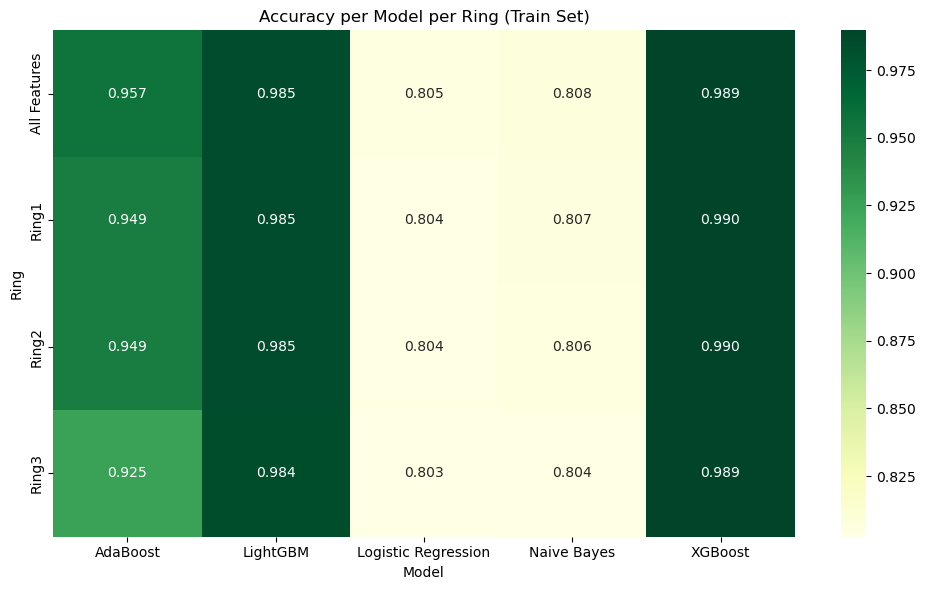

In [529]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = all_results[all_results['dataset'] == 'train']

pivot = df_plot.pivot(index='Ring', columns='algorithm', values='f1_score')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGn")
plt.title("Accuracy per Model per Ring (Train Set)")
plt.ylabel("Ring")
plt.xlabel("Model")
plt.tight_layout()
plt.show()


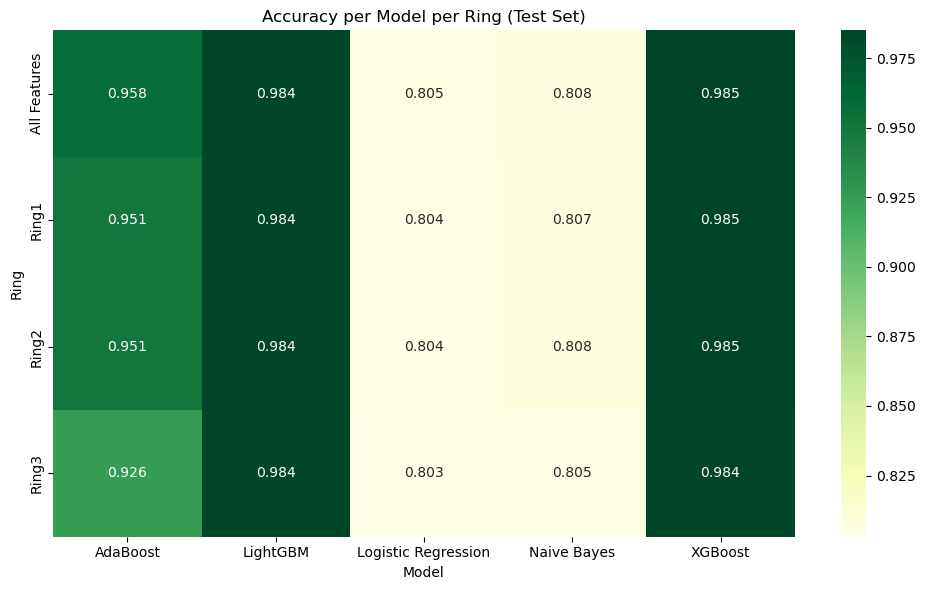

In [530]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = all_results[all_results['dataset'] == 'test']

pivot = df_plot.pivot(index='Ring', columns='algorithm', values='f1_score')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGn")
plt.title("Accuracy per Model per Ring (Test Set)")
plt.ylabel("Ring")
plt.xlabel("Model")
plt.tight_layout()
plt.show()


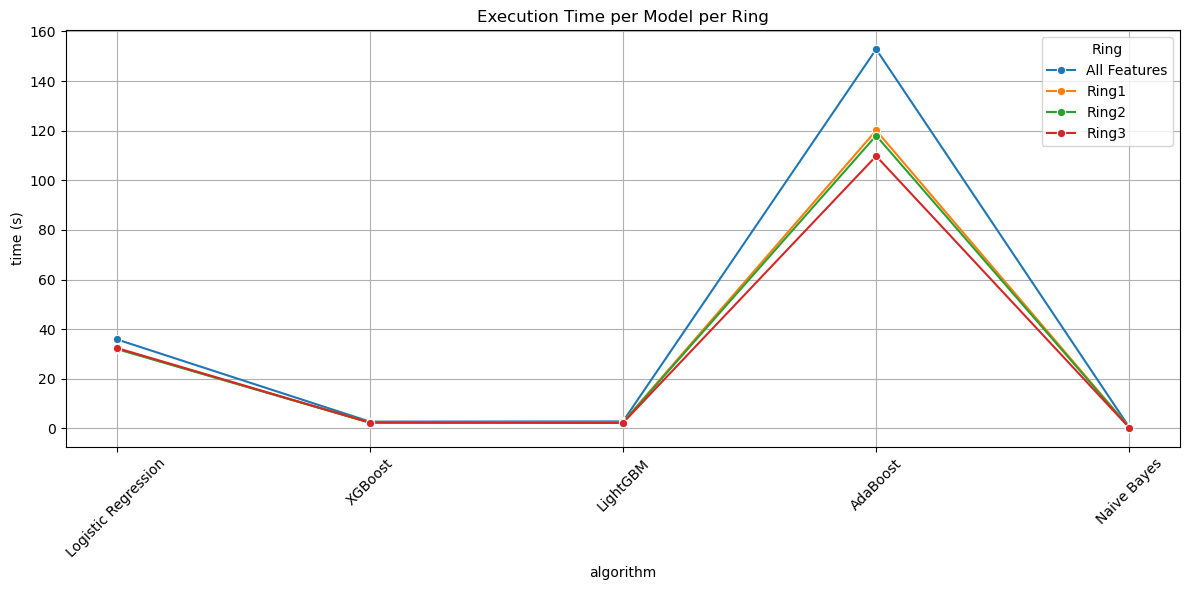

In [531]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x='algorithm', y='time (s)', hue='Ring', marker="o")
plt.title("Execution Time per Model per Ring")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


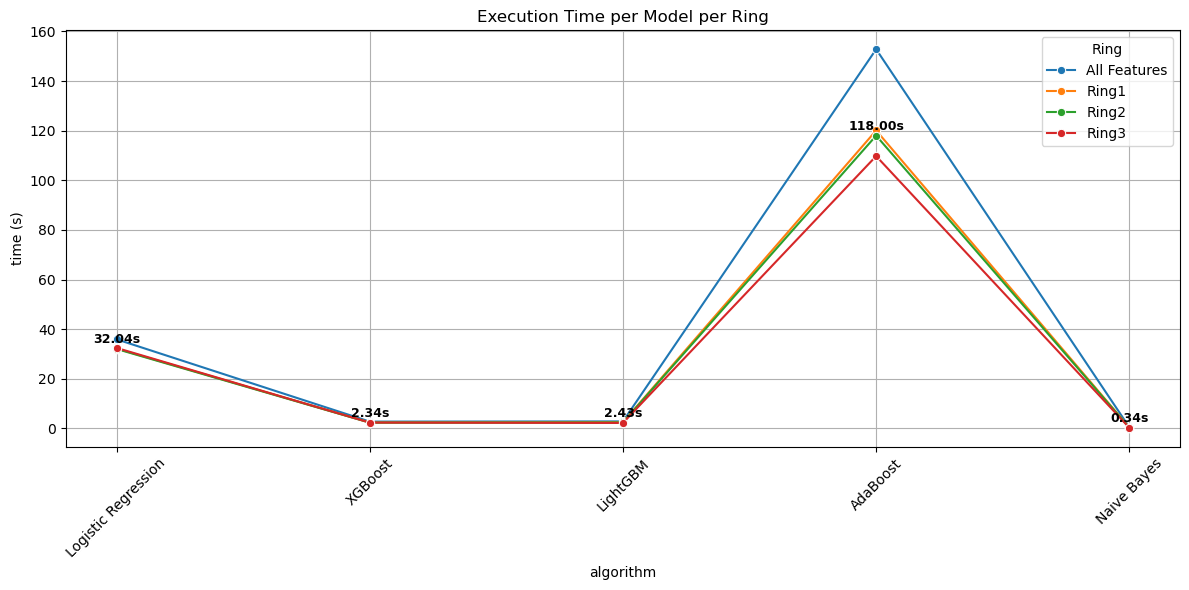

In [547]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter Ring2 saja
df_ring2 = df_plot[df_plot['Ring'] == 'Ring2']

plt.figure(figsize=(12, 6))

# Plot semua data
ax = sns.lineplot(data=df_plot, x='algorithm', y='time (s)', hue='Ring', marker='o')

# Tambah label hanya untuk Ring2
for i in range(len(df_ring2)):
    row = df_ring2.iloc[i]
    x_pos = list(df_plot['algorithm'].unique()).index(row['algorithm'])
    plt.text(
        x=x_pos,
        y=row['time (s)'] + 1,
        s=f"{row['time (s)']:.2f}s",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold',
        color='black'
    )

plt.title("Execution Time per Model per Ring")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [533]:
model_path = "model_xgboost_ring2.pkl"

# Load model
with open(model_path, "rb") as f:
    xgb_model = pickle.load(f)

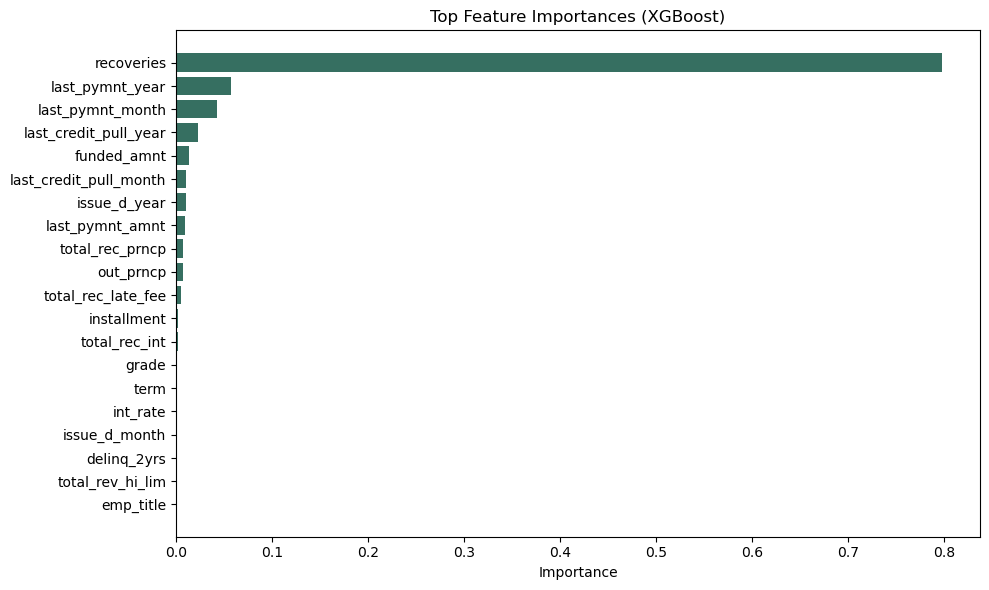

In [537]:
import pandas as pd
import matplotlib.pyplot as plt

# Ambil nilai feature importance
importance = xgb_model.feature_importances_

# Ambil nama kolom dari data yang digunakan saat training
feature_names = X_train[ring2_columns].columns  # ganti sesuai ring yang digunakan

# Buat DataFrame untuk ranking
fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

# Visualisasi top-N fitur
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(
    fi_df["Feature"][:top_n][::-1], 
    fi_df["Importance"][:top_n][::-1],
    color="#366f61"
)
plt.xlabel("Importance")
plt.title("Top Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


In [535]:

# Output DataFrame untuk dipakai lagi
fi_df.sort_values(by='Importance',ascending=False)


,Feature,Importance
0,recoveries,0.797922
4,last_pymnt_year,0.057135
2,last_pymnt_month,0.042903
17,last_credit_pull_year,0.022371
23,funded_amnt,0.013941
16,last_credit_pull_month,0.010796
19,issue_d_year,0.010419
3,last_pymnt_amnt,0.009757
1,total_rec_prncp,0.007650
5,out_prncp,0.007292


In [536]:
fi_df.head(20)

,Feature,Importance
0,recoveries,0.797922
4,last_pymnt_year,0.057135
2,last_pymnt_month,0.042903
17,last_credit_pull_year,0.022371
23,funded_amnt,0.013941
16,last_credit_pull_month,0.010796
19,issue_d_year,0.010419
3,last_pymnt_amnt,0.009757
1,total_rec_prncp,0.007650
5,out_prncp,0.007292
